In [1]:
import pandas as pd
import numpy as np

batting_6 = pd.read_csv('batting_6agg.csv')
batting_rest = pd.read_csv('batting_rest_agg.csv')
batting_6.head()

,player_id,start_year,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp
0,castrra01,1999,207,466.0,40.0,99.0,17.0,0.0,18.0,53.0,0.0,0.0,56.0,116.0,15.0,2.0,1.0,6.0,7.0
1,wisede01,2000,147,296.0,41.0,60.0,13.0,5.0,9.0,30.0,12.0,1.0,14.0,48.0,1.0,2.0,2.0,1.0,1.0
2,jeterde01,1995,786,3130.0,605.0,1008.0,153.0,35.0,78.0,414.0,108.0,37.0,341.0,572.0,11.0,48.0,23.0,23.0,66.0
3,husonje01,1988,462,1143.0,153.0,266.0,42.0,9.0,6.0,85.0,43.0,14.0,136.0,148.0,7.0,3.0,28.0,10.0,29.0
4,izturce01,2001,658,2437.0,261.0,632.0,111.0,22.0,11.0,191.0,59.0,34.0,121.0,259.0,15.0,6.0,38.0,13.0,41.0


In [2]:
#decided to use at bats for predicting
yvals_ab = batting_rest[['player_id', 'ab']]
yvals_ab.head()

,player_id,ab
0,castrra01,960.0
1,wisede01,813.0
2,jeterde01,8065.0
3,husonje01,736.0
4,izturce01,1913.0


In [3]:
features = ['g', 'ab', 'r', 'h', 'double', 'triple', 'hr', 'rbi', 'sb',
            'cs', 'bb', 'so', 'hbp', 'sh', 'sf', 'g_idp']

#Note: No sabermetric data yet; also no height/weight;
#also, we have to figure out how to handle year (which is ordinal not continuous)
#It doesn't like Ibb for whatever reason

Xframe = batting_6[features]
X = Xframe.as_matrix()
y = yvals_ab['ab'].as_matrix()

# split into training and test sets, .75/.25
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.25, random_state=54321)

Scaler = StandardScaler()
Scaler.fit(Xtrain)

Scaler.transform(Xtrain)
Scaler.transform(Xtest)

array([[ 0.70244881,  0.56194833, -0.08190936, ...,  0.69844817,
         1.68136476,  0.64636175],
       [ 1.02851116,  1.04833679,  1.38702514, ..., -1.09187784,
         0.04658251,  0.77146402],
       [ 1.31783409,  1.25090838,  1.00294593, ..., -1.02556947,
         1.1704953 ,  0.97996781],
       ..., 
       [ 0.4820123 ,  0.57928066,  0.61886673, ...,  0.6321398 ,
         0.65962585, -0.10425189],
       [-0.09204113, -0.18984141, -0.41882095, ..., -0.82664435,
         0.1487564 , -0.02085038],
       [-1.47895422, -1.461601  , -1.40260277, ...,  1.09629839,
        -1.38385197, -1.27187311]])

In [4]:
#create classifier

from sklearn.neural_network import MLPRegressor

MLP = MLPRegressor(activation='relu', hidden_layer_sizes = (13, 5), solver='lbfgs', alpha =0.1, random_state=1234)
MLP_for_grid = MLPRegressor(activation='relu', hidden_layer_sizes = (13, 5), solver='lbfgs', random_state=1234)

In [5]:
#Now, let's train the model

MLP.fit(Xtrain, Ytrain)

MLPRegressor(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1234,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [6]:
#And, make predictions

preds_test = MLP.predict(Xtest)

preds_train = MLP.predict(Xtrain)

print("First 5 Test Preds")
preds_test[0:5]

First 5 Test Preds


array([ 2373.54202922,  2944.91561897,  2920.40967958,  2394.72151101,
         376.24087743])

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

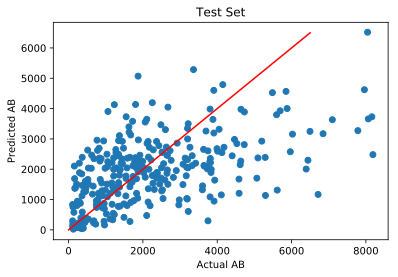

In [8]:
plt.scatter(Ytest, preds_test)
plt.title("Test Set")
plt.ylabel("Predicted AB")
plt.xlabel("Actual AB")
plt.plot([0,6500],[0,6500], 'r-')

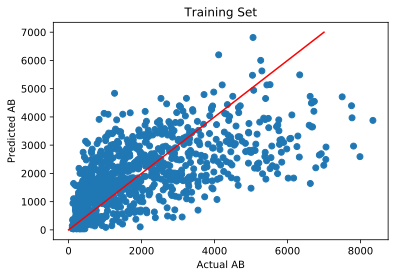

In [9]:
plt.scatter(Ytrain, preds_train)
plt.title("Training Set")
plt.ylabel("Predicted AB")
plt.xlabel("Actual AB")
plt.plot([0,7000],[0,7000], 'r-')

In [10]:
#Get R2 scores for each set
print("Training R2:")
print(MLP.score(Xtrain, Ytrain))
print("\n")
print("Test R2:")
print(MLP.score(Xtest, Ytest))

Training R2:
0.401615185001


Test R2:
0.286558420191


In [11]:
#Now let's try grid-search for regularization

MLP.get_params()

{'activation': 'relu',
 'alpha': 0.1,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (13, 5),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'momentum': 0.9,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1234,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_dict = {"alpha" : param_grid}

clf = GridSearchCV(MLP_for_grid, param_dict, return_train_score=True, scoring='r2')
clf.fit(X, y)

clf.cv_results_

{'mean_fit_time': array([ 0.26299993,  0.18500002,  0.21700001,  0.23533336,  0.30933332,
         0.23033333,  0.1329999 ,  0.12733332,  0.1236666 ]),
 'mean_score_time': array([ 0.00100001,  0.00033339,  0.00066662,  0.00066678,  0.00133332,
         0.0006667 ,  0.0006667 ,  0.00033331,  0.0006667 ]),
 'mean_test_score': array([ 0.33935666,  0.32892782,  0.33260752,  0.34251734,  0.34618392,
         0.32953772,  0.33696405,  0.33640806,  0.3447906 ]),
 'mean_train_score': array([ 0.3858002 ,  0.38377714,  0.38711627,  0.37897692,  0.3786938 ,
         0.38786021,  0.38642939,  0.38360969,  0.37967801]),
 'param_alpha': masked_array(data = [1e-05 0.0001 0.001 0.01 0.1 1 10 100 1000],
              mask = [False False False False False False False False False],
        fill_value = ?),
 'params': [{'alpha': 1e-05},
  {'alpha': 0.0001},
  {'alpha': 0.001},
  {'alpha': 0.01},
  {'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 10},
  {'alpha': 100},
  {'alpha': 1000}],
 'rank_test_score': ar

In [13]:
clf.best_score_

0.34618391565353696

In [14]:
#Now, try Decision Tree Classifier

from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(max_depth = 2, min_samples_leaf = 1, random_state=1234)
DTR.fit(Xtrain, Ytrain)
tree_pred_train = DTR.predict(Xtrain)

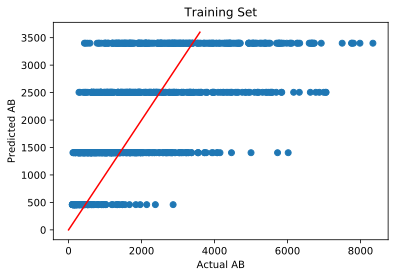

In [15]:
plt.scatter(Ytrain, tree_pred_train)
plt.title("Training Set")
plt.ylabel("Predicted AB")
plt.xlabel("Actual AB")
plt.plot([0,3600],[0,3600], 'r-')

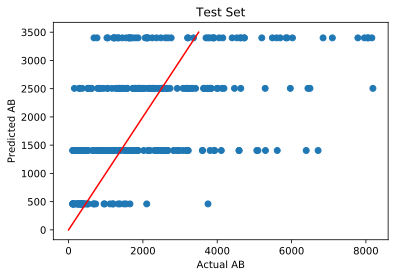

In [16]:
tree_pred_test = DTR.predict(Xtest)

plt.scatter(Ytest, tree_pred_test)
plt.title("Test Set")
plt.ylabel("Predicted AB")
plt.xlabel("Actual AB")
plt.plot([0,3500],[0,3500], 'r-')

In [17]:
#Get R2 scores for each set
print("Training R2:")
print(DTR.score(Xtrain, Ytrain))
print("\n")
print("Test R2:")
print(DTR.score(Xtest, Ytest))

Training R2:
0.375739950484


Test R2:
0.236077831888


In [18]:
DTR_2 = DecisionTreeRegressor(random_state=1234)
mx_dpth = [2, 3, 4, 5, 6, 7]
mn_lf_splt = [1, 2, 3, 4]
param_dict_rf = {'max_depth': mx_dpth, 'min_samples_leaf' : mn_lf_splt}
clf_rf = GridSearchCV(DTR_2, param_dict_rf, return_train_score=True, scoring='r2')

In [19]:
clf_rf.fit(X, y)
clf_rf.cv_results_

{'mean_fit_time': array([ 0.00233324,  0.00300002,  0.00333333,  0.00266671,  0.00433342,
         0.00633327,  0.00400003,  0.00366656,  0.00499988,  0.00500003,
         0.00566665,  0.00433334,  0.00566665,  0.00500003,  0.00533334,
         0.00500003,  0.00599996,  0.00666666,  0.00466657,  0.00666658,
         0.00766667,  0.00633335,  0.00533326,  0.00500003]),
 'mean_score_time': array([ 0.00033339,  0.00066662,  0.00033331,  0.00133324,  0.00066662,
         0.0013334 ,  0.00033331,  0.0013334 ,  0.00100009,  0.00033331,
         0.0006667 ,  0.00033331,  0.00066662,  0.00033331,  0.00100001,
         0.00066662,  0.00033331,  0.00066662,  0.00066678,  0.00033331,
         0.00033331,  0.00033331,  0.00100001,  0.0006667 ]),
 'mean_test_score': array([ 0.32362454,  0.32362454,  0.32362454,  0.32362454,  0.30384275,
         0.30384275,  0.30384275,  0.30384275,  0.26937826,  0.27650964,
         0.27823443,  0.28101733,  0.23234105,  0.26449754,  0.23866542,
         0.2420412

In [20]:
clf_rf.best_params_

{'max_depth': 2, 'min_samples_leaf': 1}